## 프로젝트 제목 : 타이타닉 생존자 예측

## 사용한 알고리즘 : 랜덤 포레스트

## 정확도 : 81.01%

## 데이터셋 : https://www.kaggle.com/c/titanic/data


train.csv: 모델 학습에 사용되는 데이터로, 생존 여부를 포함합니다.
test.csv: 모델이 예측할 데이터를 제공합니다.
gender_submission.csv: 샘플 제출 파일입니다.

In [69]:
# 필요한 라이브러리 불러오기
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 파일 경로 설정 (폴더 위치를 기준으로 수정)
train_path = "Titanic/train.csv"
test_path = "Titanic/test.csv"
gender_submission_path = "Titanic/gender_submission.csv"

# 각 파일 읽기
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
gender_submission_data = pd.read_csv(gender_submission_path)

# 데이터 확인
print("Train Data:")
print(train_data.head(), "\n")

print("Test Data:")
print(test_data.head(), "\n")

print("Gender Submission Data:")
print(gender_submission_data.head())


Train Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN  

In [70]:
#2. 데이터 전처리
# 데이터 전처리: 성별(Sex)과 탑승 항구(Embarked)를 숫자로 변환
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

# 'Embarked'의 결측값을 최빈값으로 채우기
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

# 'Fare'와 'Age' 결측값을 평균값으로 채우기
train_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)


# 범주형 'Embarked' 변환
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

성별(Sex): 성별 정보를 남성과 여성을 구분하기 위해 이를 숫자 0 (남성)과 1 (여성)으로 변환합니다.
Embarked 컬럼도 범주형 데이터입니다. 승객들이 탑승한 항구(Cherbourg, Queenstown, Southampton)를 각각 C, Q, S로 나타내며, 이를 숫자로 변환합니다.
결측값 처리: 결측값이 있는 Age, Fare, Embarked 컬럼에 대해 평균값과 최빈값으로 결측값을 채웁니다.

성별(Sex): 성별 정보를 남성과 여성을 구분하기 위해 이를 숫자 0 (남성)과 1 (여성)으로 변환합니다.
Embarked 컬럼도 범주형 데이터입니다. 승객들이 탑승한 항구(Cherbourg, Queenstown, Southampton)를 각각 C, Q, S로 나타내며, 이를 숫자로 변환합니다.
결측값 처리: 결측값이 있는 Age, Fare, Embarked 컬럼에 대해 평균값과 최빈값으로 결측값을 채웁니다.
데이터 전처리: 성별(Sex)과 탑승 항구(Embarked)를 숫자로 변환

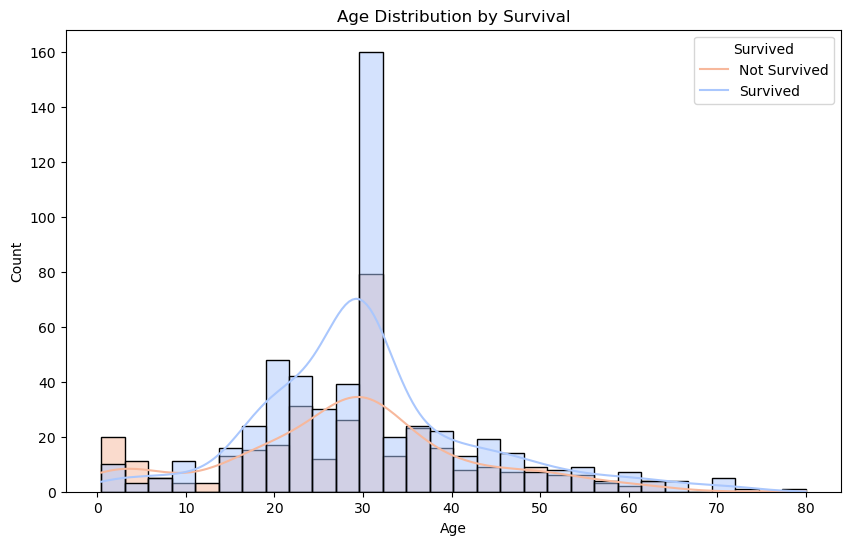

In [71]:
# FutureWarning 무시
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Inf 값을 NaN으로 변환
train_data.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# 생존 여부에 따른 나이 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='Age', hue='Survived', kde=True, palette='coolwarm', bins=30)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()


20 ~ 40대 승객의 생존률이 높음을 확인

In [72]:
# 특징 변수(X)와 목표 변수(y) 설정
X = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train_data['Survived']

# 학습용/검증용 데이터 나누기
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
#3. 모델 학습

# 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

랜덤 포레스트(Random Forest) 알고리즘을 사용하여 학습합니다.
train.csv의 데이터를 기반으로 승객의 생존 여부(Survived)를 예측하기 위해 여러 개의 결정 트리로 모델을 구성합니다.
RandomForestClassifier(): 랜덤 포레스트 모델을 초기화하고, n_estimators=100으로 100개의 트리를 사용하여 학습합니다.

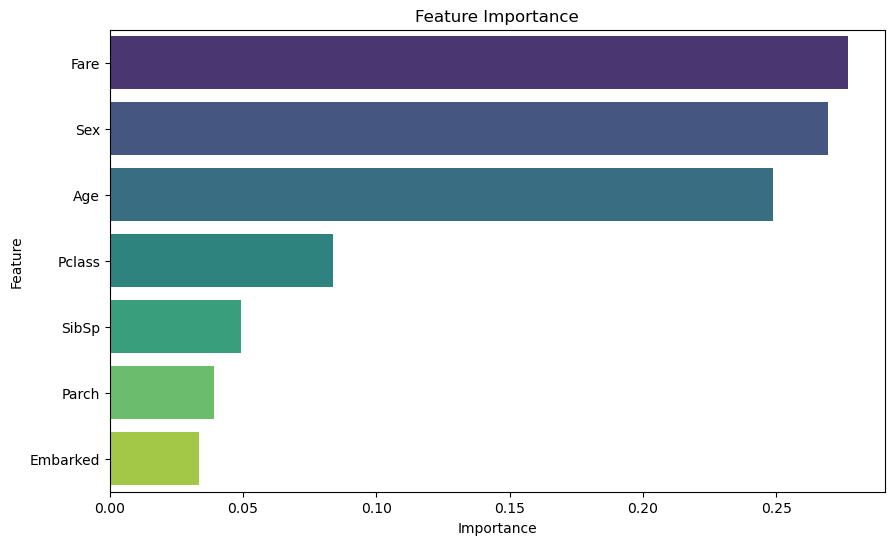

In [74]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt  # 시각화를 위해 추가
import seaborn as sns  # 시각화를 위해 추가
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 데이터 전처리 및 모델 학습 (이전 코드)

# 1. 특성 중요도 시각화
feature_importances = rf_model.feature_importances_
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [75]:
#4. 성능 평가

# 검증 데이터로 예측
y_pred = rf_model.predict(X_val)


# 성능 평가
accuracy = accuracy_score(y_val, y_pred)
print(f'모델 정확도: {accuracy * 100:.2f}%')

# test.csv 데이터 전처리
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

# 특징 변수 설정 (명시적 복사)
X_test = test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy()

# 결측값 처리
X_test.fillna(0, inplace=True)

# 예측 수행
test_predictions = rf_model.predict(X_test)

# 예측 결과 저장
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': test_predictions})
output.to_csv('submission.csv', index=False)

print("Predictions saved to submission.csv!")


모델 정확도: 81.01%
Predictions saved to submission.csv!


모델을 검증용 데이터(X_val, y_val)로 평가하여 정확도를 계산합니다.
예측 결과와 실제 생존 여부를 비교하여 모델의 성능을 평가합니다.

모델을 검증용 데이터(X_val, y_val)로 평가하여 정확도를 계산합니다.
예측 결과와 실제 생존 여부를 비교하여 모델의 성능을 평가합니다.

test.csv 데이터를 이용해 승객들의 생존 여부를 예측하고, 결과를 submission.csv 파일로 저장합니다.

모델 정확도: 81.01%


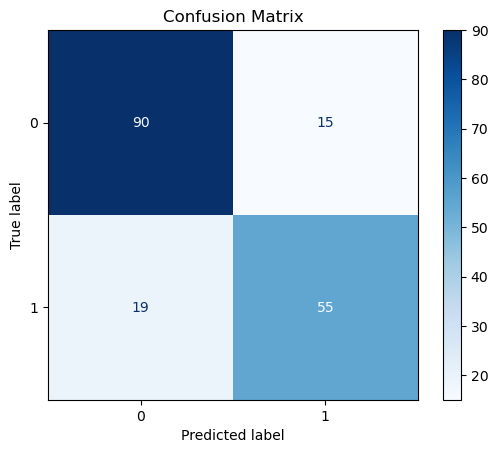

In [76]:
# 성능 평가
accuracy = accuracy_score(y_val, y_pred)
print(f'모델 정확도: {accuracy * 100:.2f}%')

# 혼동 행렬 시각화
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [77]:
#6. 결과 제출

# 결과를 CSV 파일로 저장
output.to_csv('submission.csv', index=False)

print("예측 결과가 'submission.csv' 파일로 저장되었습니다.")

예측 결과가 'submission.csv' 파일로 저장되었습니다.


## 결론
승객의 요금, 성별, 나이가 생존 여부를 예측하는 데 가장 큰 영향을 미쳤습니다.
즉, 여성일수록, 나이가 젊을수록, 그리고 요금이 높을수록 생존 확률이 높았습니다.

# Chat gpt 사용한 곳

## 타이타닉 생존자 예측을 할 때 랜덤 포레스트를 사용한 이유가 뭐야?

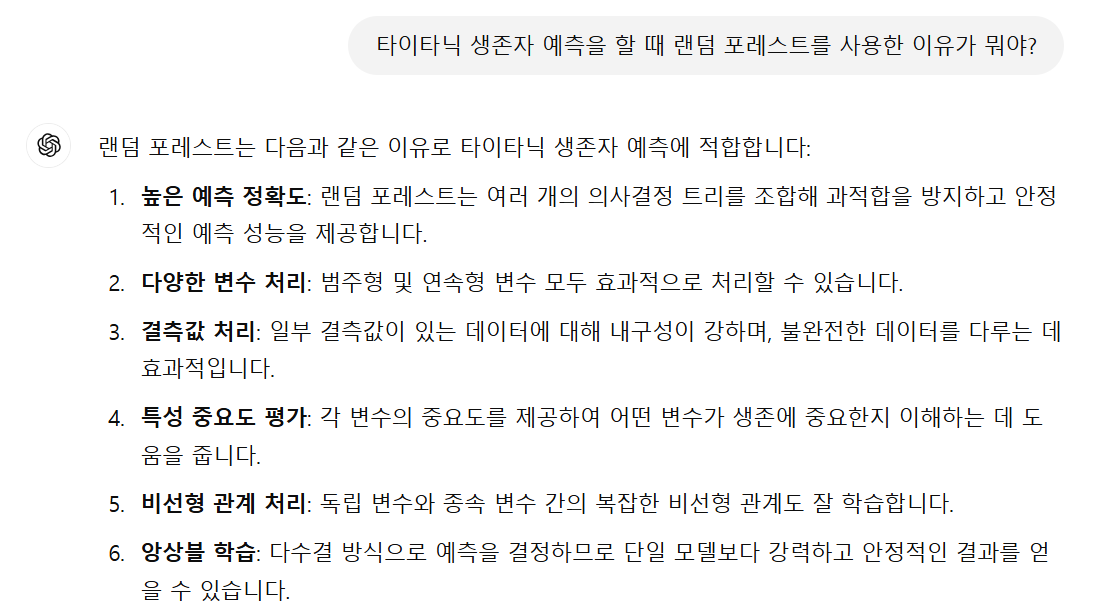

# 도움 받은 곳
 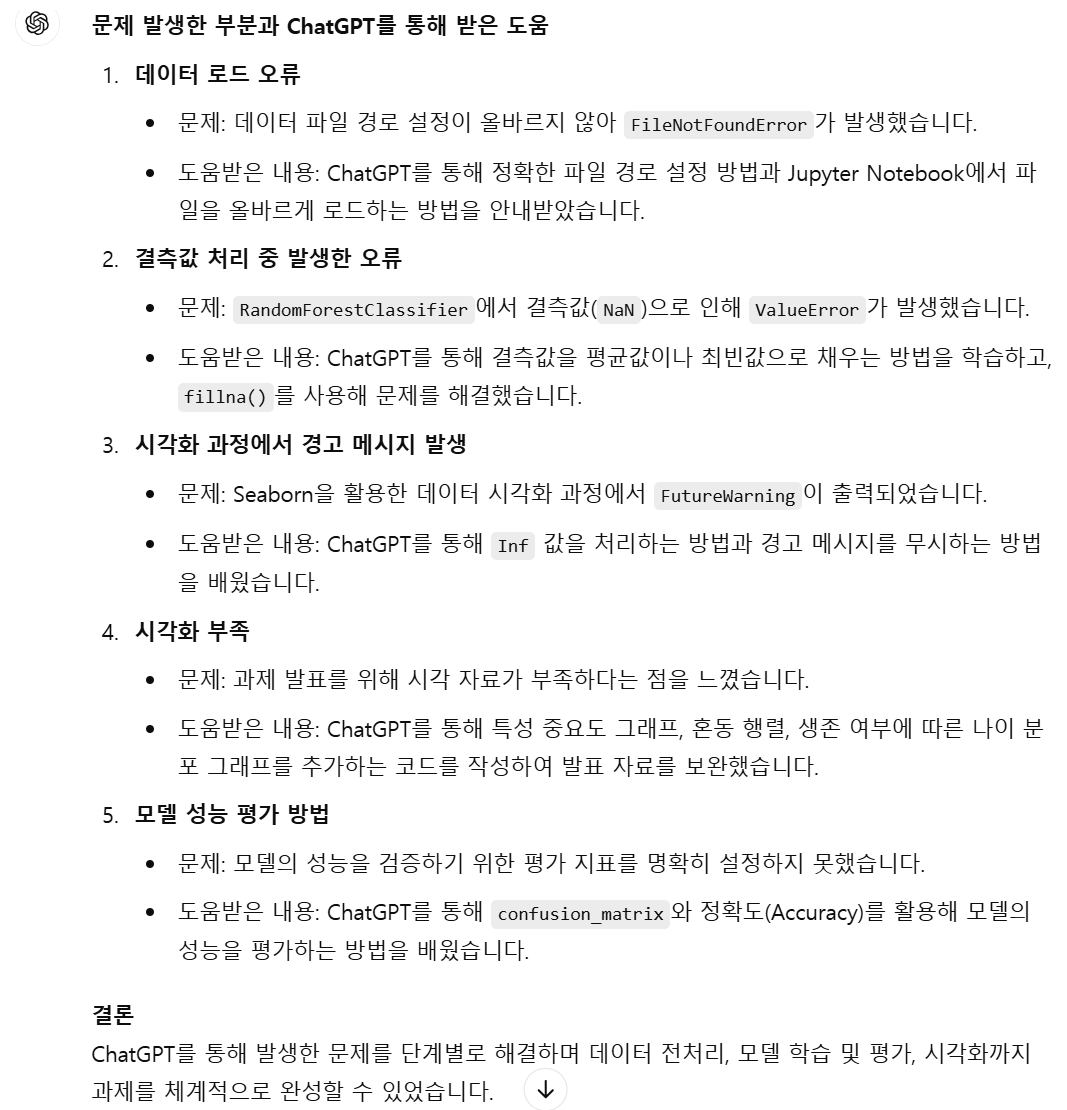